# Linear Regression

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
from __future__ import division
X = 2*np.random.rand(100,1)

y= 4+3*X + np.random.rand(100,1)

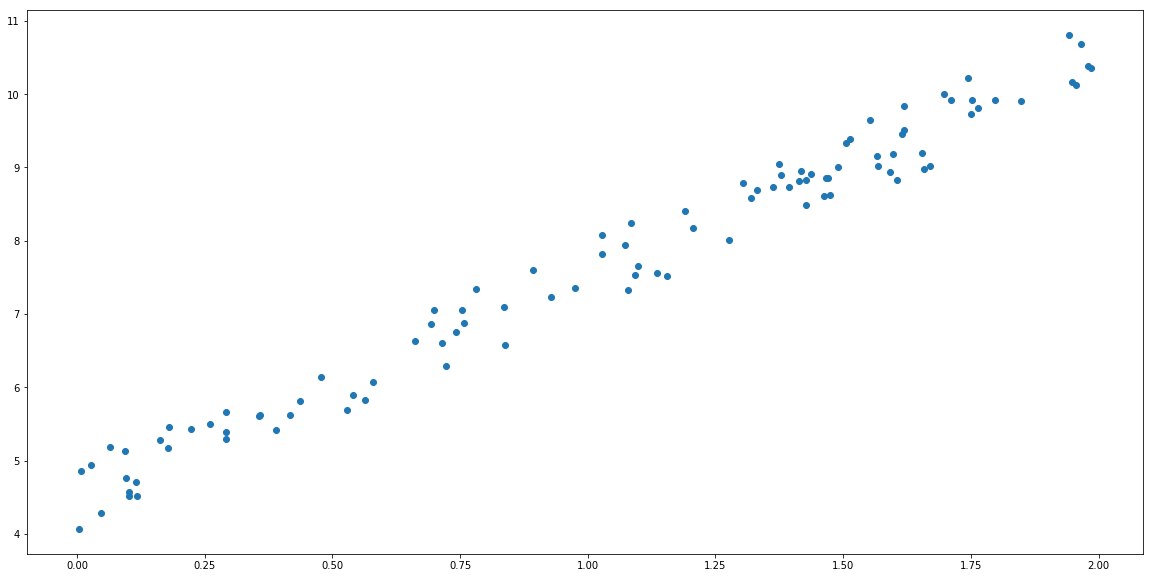

In [3]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)),X]

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.53563037],
       [2.99659562]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.53563037],
       [10.52882161]])

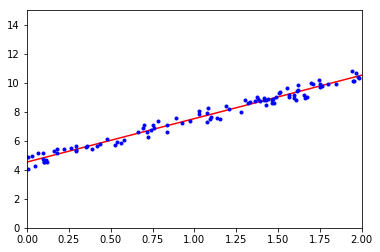

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

**The equivalent code using Scikit-learn**

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.53563037]), array([[2.99659562]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.53563037],
       [10.52882161]])

# Computational Complexity

**The Normal Equation gets very slow when the number of features grows large**

# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to wide range of problem.

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function

**Partial derivatives of the cost function**

$\frac{\delta}{\delta\theta_j}MSE(\theta) = \frac{2}{m}\sum^{m}\limits_{i=1}\lgroup\theta^T \cdot x^{i}-y^i\rgroup x^i_j$

**When using Gradient Descent make sure that all the features have a small scales(eg. using scikit-learn StandardScaler class), or else it will take much longer to converge**

$\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$

**Implementation of this algorithm:**

In [14]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [15]:
theta = np.random.randn(2,1) # random initialization normal distribution

In [16]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients

In [17]:
theta

array([[4.53563037],
       [2.99659562]])

# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it use the whole training set to compute the gradients at every step, which makes it very slow when the training set is large

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only onteh single instance.

*Oover time it will end up very close to minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but nbnot optimal*

**Implements Stochastic Gradient Descent using a simple learning schedule:**

In [18]:
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparamters

def learning_schedule(t):
    return t0/(t+t1)

In [19]:
theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients

In [20]:
theta

array([[4.54004844],
       [3.00756966]])

**Perform Linear Regression using SGD with Scikit-learn**

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [23]:
sgd_reg.fit(X, y.ravel())

/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.53367926]), array([2.99766954]))

# Mini-batch Gradient Descent

Then main advantage of Mini-batch GD over Stochastic is you can get a performance boost from hardware optimization of matrix operations, especailly when using GPUs

# Polynomial Regression

In [25]:
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

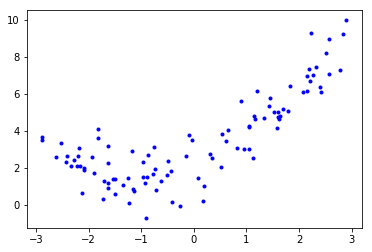

In [26]:
plt.plot(X, y, "b.")

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)


In [29]:
X_poly = poly_features.fit_transform(X)

In [30]:
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
lin_reg.intercept_, lin_reg.coef_

(array([2.11633355]), array([[1.05128735, 0.50157062]]))

In [33]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_ploy = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_ploy)

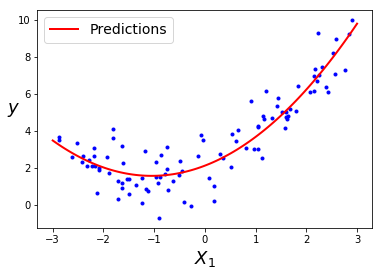

In [34]:
plt.plot(X,y,"b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label = "Predictions")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

# Learning Curves

These are plots of the model's performance on the training set and the validation set as a function of the training set size.

To generate the plots, simply train the model several times on different sized subsets of the training set.

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split

In [36]:
def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),"b-", linewidth=2, label="validation")
    plt.legend(loc="upper right")

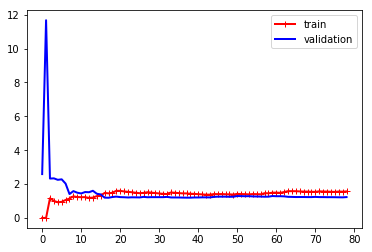

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

These learning curves are typical underfitting model. Both curves have reached a plateaus; they are close and fairly high.

**If a model is underfitting the training data, adding more training sample will not help. Need to use more complex model or come up with better features.**

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
polynomial_regression= Pipeline((
    ("poly_feature", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_clf", LinearRegression()),
))

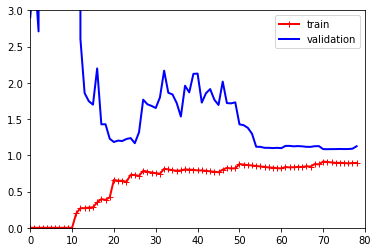

In [40]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

These learning curves look a bit like previous ones, but there are two important differences:
* The error on training data is much lower than Linear regression model.
* There is a gap between the curve. This means that the model perform significantly better on training set than validation set, which is hallmark of an overfitting model. However, if you used a much larger training data, the two curves would continue to get closer.

**One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error**

# The Bais/Variance Tradeoff

**Bais:**

This part of the generalization error is due to wrong assumptions, such as assumping that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

**Variance:**

This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom(such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

**Irreducible error:**

This part is due to the noisiness of the data itself. The only way to reduce teh part of the error is to clean up the data(e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

**Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a trade off**

# Regularized Linear Models

A good way to reduce the overfitting is to regularize teh model. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achiveved by constraining the weights of the model.

## Ridge Regression

*a regularization term equal to $\alpha\sum_{i=1}^n\theta_i^2$ is added to the cost function*

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model 

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha=0$ then Ridge Regression is just linear Regression 

**Ridge Regression cost function:**

$J(\theta) = MSE(\theta)+\alpha\frac{1}{2}\sum_\limits{i=1}^n\theta_i^2$

*Note that the bias term $\theta_0$ is not regularized(the sum starts at i=1, not 0)*

**It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.**

**Rige Regression closed-form solution**

$\hat{\theta} = (X^T\cdot X + \alpha A)^{-1}\cdot X^T \cdot y$

**Perform Ridge Regression with Scikit-Learn using a closed-form solution**

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.1293839]])

**Using Stochastic Gradient Descent:**

In [42]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.2210848])

## Lasso Regression

**Lasso Regression cost function**

$J(\theta) = MSE(\theta) + \alpha \sum_\limits{i=1}^n |\theta_i|$

An important characteristic of Lasso Regression is that is tends to completely eliminate the weights of the least important features(i.e set the to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model(i.e., with few nonzero feature weights)

In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.15]])

array([4.71149399])

**Using Stochastic Gradient Descent:**

In [44]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.2310738])

## Elastic Net

The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Rige Regression,and when r = 1, it is equivalent to Lasso Regression

**Elastic Net cost function**

$J(\theta) = MSE(\theta) + r\alpha\sum_\limits{i=1}^n|\theta_i|+ \frac{1-r}{2}\alpha\sum_\limits{i=1}^n\theta_i^2$

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.07804462])

## Early Stopping

Regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation errro reaches a minimum.

When the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data.With early stopping you just stop training as soon as the validation error reaches the minimum.

With Stochastic and Mini-batch Gradient Descent, the curves are not as smooth, and it may be hard to know whether you have reached the minimum or not. *one solution is to stop only after the validation error has been above the minimum for some time, then roll back the model parameters to the point where the validation error was at a minimum.

In [47]:
from sklearn.base import clone

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [50]:
poly_scaled = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scale", StandardScaler())
])

In [51]:
X_train_poly_scaled = poly_scaled.fit_transform(X_train)
X_val_poly_scaled = poly_scaled.fit_transform(X_val)

In [52]:
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predit = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predit, y_val)
    if(val_error < minimum_val_error):
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  Dep

/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjia

/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjia

/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjiang/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/peilinjia

In [53]:
best_epoch, best_model

(810, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=True))

# Logistic Regression

Logistic Regression is commonly used to estimate the probability that an instance belongs to particular class

## Estimating Probabilities

A Logistic Regression model computes a weighted sum of the input features(plus a bias term), but instead of outputting the result directly like the linear Regression model does, it outputs teh logistic of this result

**Logistic Regression model estimated probability(vectorized form)**

$\hat{p} = h_{\theta}(x) = \sigma(\theta^T \cdot x)$

In [54]:
from sklearn import datasets

In [55]:
iris = datasets.load_iris()
list(iris)

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [56]:
X = iris["data"][:,3:] #petal width
y = (iris["target"] ==2).astype(np.int) # 1 if Iris-Virginica, else 0

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm

In [59]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

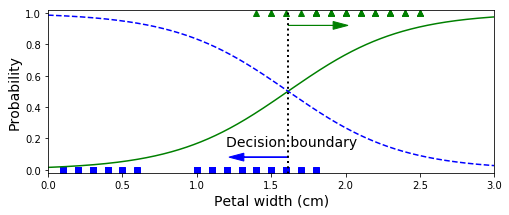

In [60]:
decision_boundary = X_new[y_proba[:,1]>=0.5][0]

plt.figure(figsize=(8,3))
plt.plot(X[y==0],y[y==0],"bs")
plt.plot(X[y==1],y[y==1],"g^")
plt.plot([decision_boundary, decision_boundary],[-1,2],"k:", linewidth=2)

plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0],"b--", label="Not Iris-Virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0 , head_width = 0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width = 0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [61]:
decision_boundary

array([1.61561562])

In [62]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

# Softmax Regression

The Logistic Regression model can be generalized to support multiple classed directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

The softmax Regression classifier predicts only one class at a time(i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple pepole in one picture.

In [63]:
X = iris["data"][:,(2,3)] # petal length, petal width
y = iris["target"]

In [64]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [65]:
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

**solver: ** <br/>
Algorithm to use in the optimization problem.
* For small datasets. "liblinear" is a good choice, whereas 'sag'and 'saga' are faster for large one.
* For multiclass problems, only 'newton-cg','sag','saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.
* 'newton-cg', 'lbfgs' and 'sag' only handle L2 penalty, whereas 'liblinear' and 'saga' handle L1 penalty.

Note that 'sag' and 'saga' fast voconergene is only guaranteed on features with approximately the same scale.

**C** <br>
Inverse of regularization strength; must ne a positive float. Like in support vector machines, smaller values specify stronger regularization

In [66]:
softmax_reg.predict([[5,2]])

array([2])

In [67]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

# Exercises

1. Suppose the feautres in your training set have very different scales. what algorithms might suffer from this, and how? what can you do about it?

Answer: If the features in your training set have very differnt scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to coverge. To solve this you should scale the data before training the model. Note the Normal Equation will work just fine without scaling.

2. Can Gradient Descent get suck in a local minimum when training a logistic Regression model?

Answer: Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex

3. Do all Gradient Descent algorithm lead to the same model provied you let them run long enough?

If the optimization problem is convex(such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithm will approach the  global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models

4. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

Answer: If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce teh learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training.

**Implement Batch Gradient Descent with early stopping for Softmax Regression(without using Scikit-Learn)**

In [68]:
X = iris["data"][:,(2,3)] #petal lenght, petal width
y = iris["target"]

In [71]:
#add the bias term for every instance 
X_with_bias = np.c_[np.ones([len(X),1]), X]

In [73]:
np.random.seed(2042)

In [74]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size*test_ratio)
validation_size = int(total_size*validation_ratio)
train_size = total_size-test_size-validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = y[rnd_indices[train_size:-test_size]]

NameError: name 'total_size' is not defined

In [ ]:
()